### PCA AND K_Means Implement In Iris Dataset|

In [1]:
#Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('G:/GrandBunkerLearning_HuB/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
n_df = df.drop(columns=['Species'])

In [33]:
n_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [34]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [35]:
n_df.shape

(150, 5)

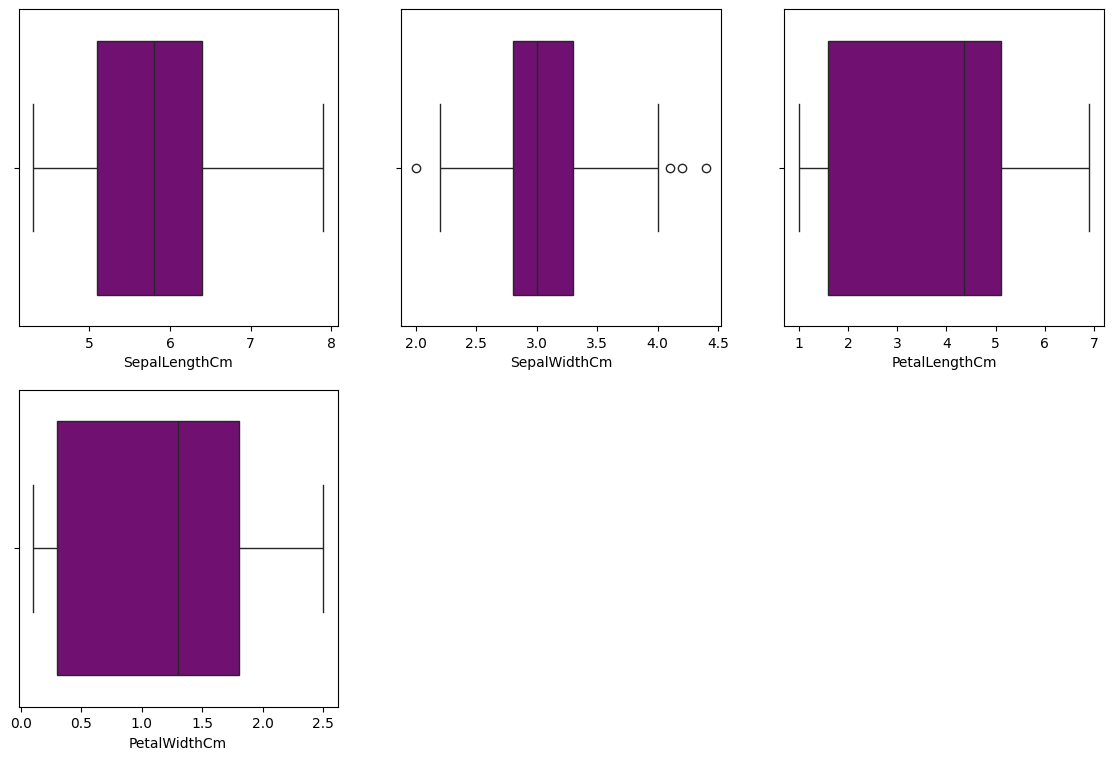

In [41]:
import seaborn as sns
columns = ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']
plt.figure(figsize = (14, 14))

for i,col in enumerate(columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(data = n_df, x = col, color = 'purple')
plt.show()

### Outlair Remove

In [57]:
import numpy as np

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = n_df['SepalWidthCm'].quantile(0.25)
Q3 = n_df['SepalWidthCm'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [58]:
print(lower_bound)

2.05


In [43]:
n_df[n_df['SepalWidthCm']>4]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
15,16,5.7,4.4,1.5,0.4
32,33,5.2,4.1,1.5,0.1
33,34,5.5,4.2,1.4,0.2


In [59]:
n_df[n_df['SepalWidthCm']<2.05]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,61,5.0,2.0,3.5,1.0


In [22]:
n_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [64]:
clean_df = n_df.drop([15,32,33,60])

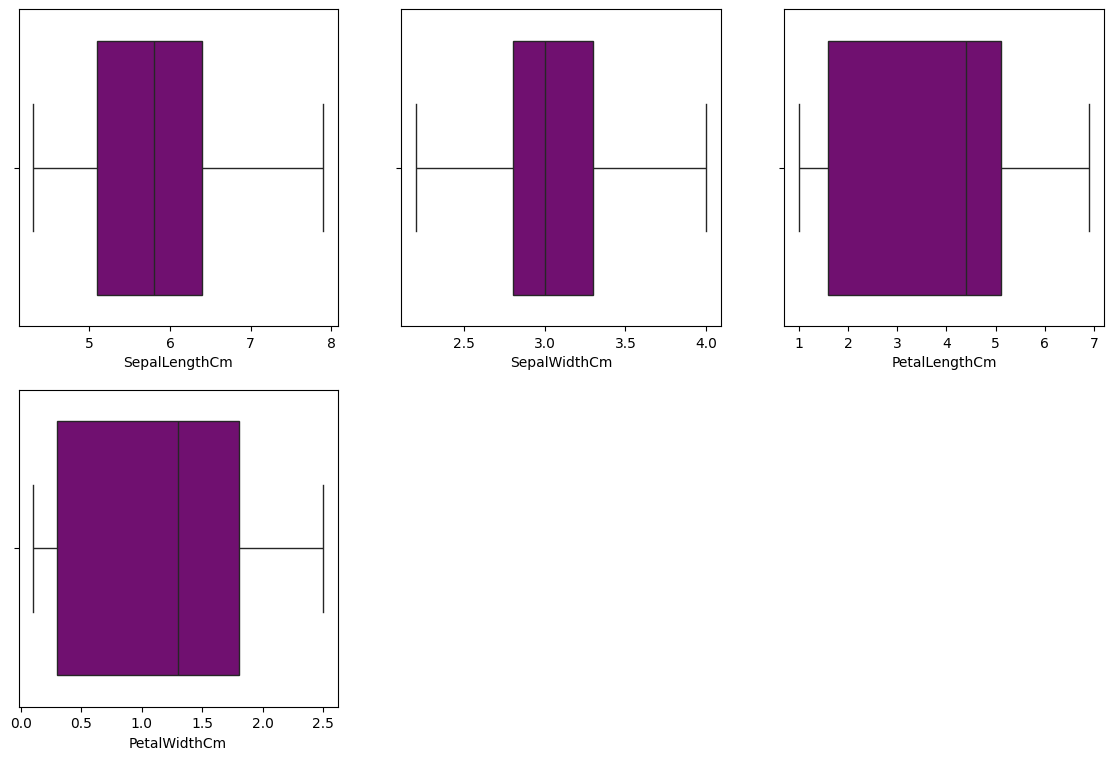

In [65]:
import seaborn as sns
columns = ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']
plt.figure(figsize = (14, 14))

for i,col in enumerate(columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(data = clean_df, x = col, color = 'purple')
plt.show()

In [66]:
clean_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


### PCA Analysis

In [67]:
# Performing scaling
scaler = StandardScaler()
X = scaler.fit_transform(clean_df)

In [68]:
preprocessed_df = pd.DataFrame(data = X, columns = clean_df.columns)
preprocessed_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.745376,-0.910515,1.175789,-1.374878,-1.345899
1,-1.722284,-1.151122,-0.093924,-1.374878,-1.345899
2,-1.699192,-1.391729,0.413961,-1.431986,-1.345899
3,-1.676099,-1.512032,0.160019,-1.317771,-1.345899
4,-1.653007,-1.030819,1.429732,-1.374878,-1.345899


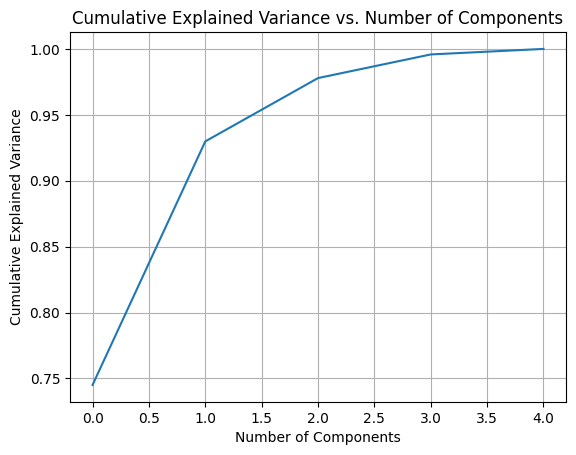

Number of components to retain 90.0% variance: 2


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA()
pca.fit(preprocessed_df)  # X is your data matrix

# Plot cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

desired_variance_ratio = 0.90

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= desired_variance_ratio) + 1

print(f"Number of components to retain {desired_variance_ratio * 100}% variance: {num_components}")

### Implement Pca

In [74]:
pca = PCA(n_components = None)
dfx_pca = pca.fit(preprocessed_df)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_>0.10)

In [75]:
n_components

2

In [80]:
pca = PCA(n_components = n_components)
iris_pca = pca.fit_transform(preprocessed_df)

In [81]:
iris_pca

array([[-2.89287475e+00,  6.59941947e-01],
       [-2.70870679e+00, -6.07294566e-01],
       [-2.94853833e+00, -2.22644470e-01],
       [-2.87710995e+00, -4.98168490e-01],
       [-2.95928647e+00,  8.51049562e-01],
       [-2.67924472e+00,  1.75752672e+00],
       [-2.97583630e+00,  2.17629483e-01],
       [-2.78394207e+00,  3.78610772e-01],
       [-2.84687285e+00, -1.06113426e+00],
       [-2.71330402e+00, -3.84986697e-01],
       [-2.70189053e+00,  1.25602404e+00],
       [-2.81923549e+00,  2.92825223e-01],
       [-2.70722416e+00, -6.67788155e-01],
       [-3.05607028e+00, -8.87563309e-01],
       [-2.69630385e+00,  2.12679386e+00],
       [-2.67373993e+00,  1.74254012e+00],
       [-2.63757616e+00,  6.60057148e-01],
       [-2.38122359e+00,  1.63000054e+00],
       [-2.75535222e+00,  1.36960218e+00],
       [-2.36313721e+00,  5.44880415e-01],
       [-2.61039788e+00,  1.14295744e+00],
       [-3.09387232e+00,  6.61119580e-01],
       [-2.23785359e+00,  2.11509098e-01],
       [-2.

### K_Means Implement

In [82]:
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(iris_pca)
    inertia.append(kmeans.inertia_)

C:\Users\antuh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\antuh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\antuh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\antuh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

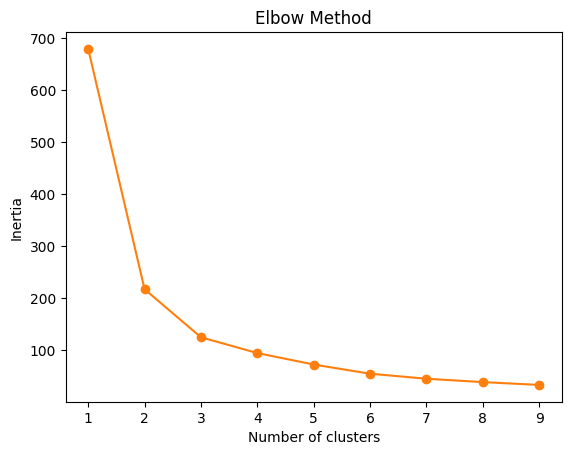

In [85]:
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [92]:
model = KMeans(n_clusters = 2, random_state = 42).fit(iris_pca)

C:\Users\antuh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


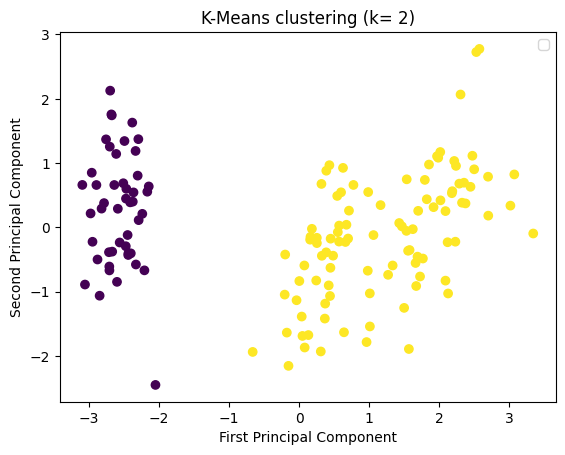

In [94]:
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c = model.labels_, cmap = 'viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-Means clustering (k= 2)')
plt.legend()
plt.show()

In [95]:
clean_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [98]:
clean_df['Species'] = model.labels_
clean_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1


In [101]:
clean_df['Species'].replace({0: 'Iris-setosa', 1: 'Iris-virginica'}, inplace=True)

In [102]:
clean_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
